In [1]:
import pandas as pd
import pyodbc
import numpy as np
import sys
import pathlib
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [2]:
datafilename='Tenzing Assesment Data Set.csv'

df0=pd.read_csv(datafilename)
s=df0.dtypes
s=s[s=='object']
s.drop(labels=['class'],inplace=True)


In [3]:
def draw(column_name):

    ### prepare dataframe to get df
    df=df0.groupby(['class',column_name]).count()[['duration']]
    df.reset_index(inplace=True)
    df.columns=['class',column_name,'count']

    df.loc[df['class']=='good','count']=df.loc[df['class']=='good','count']*3/7
    df=df.pivot(index='class',columns=column_name,values='count')


    ### plot checking_status

    ycmap = ListedColormap((sns.color_palette('bright'))) # deep, muted, pastel, bright, dark, and colorblind

    _=df.plot.bar(figsize=(6.4, 4.4), cmap=ycmap,title=column_name+' vs Class (Grouped Bar Chart)')
    _=plt.ylabel('Count')
    _=plt.xticks(rotation=45)
    _=plt.legend(loc="upper center",prop={'size': 7})


    _=plt.show()

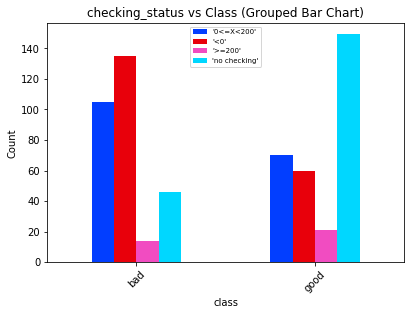

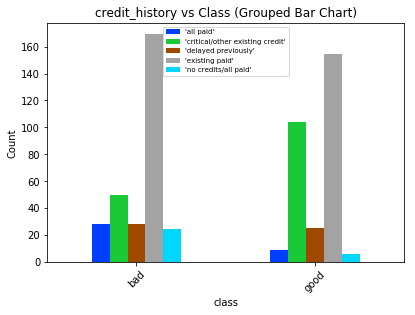

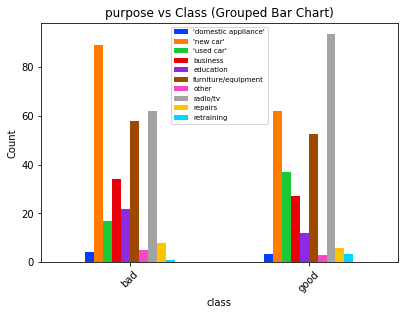

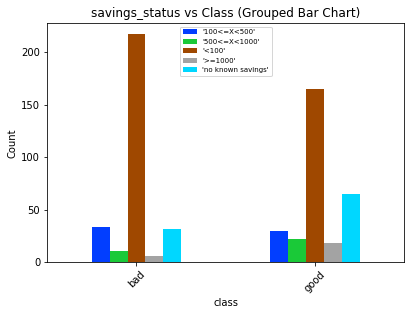

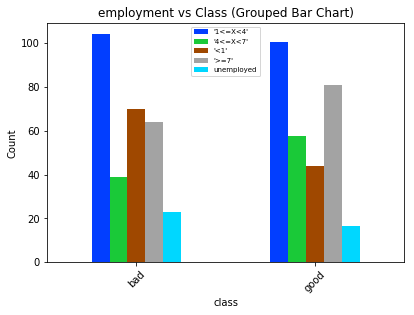

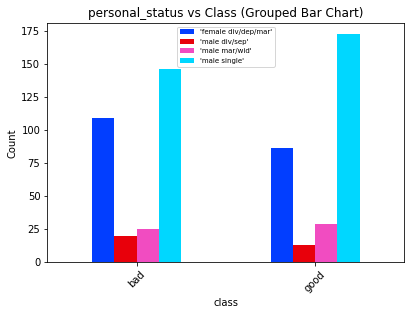

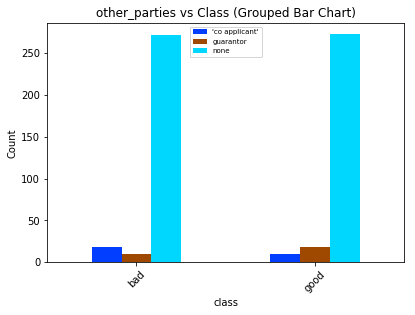

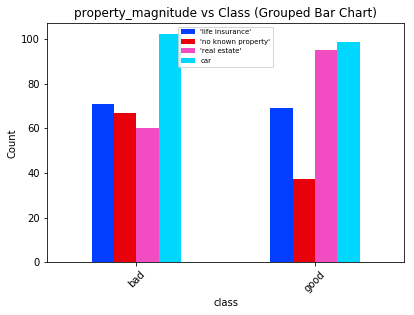

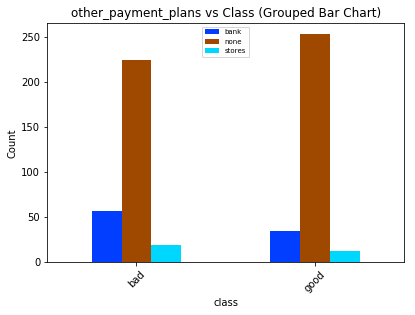

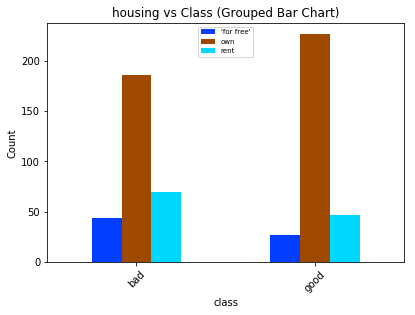

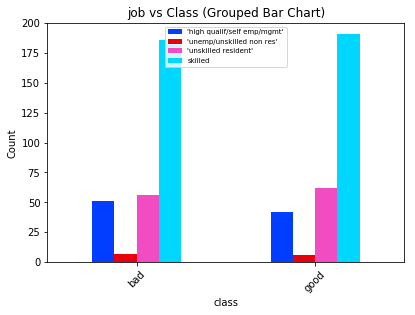

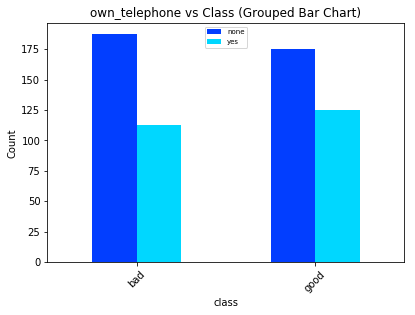

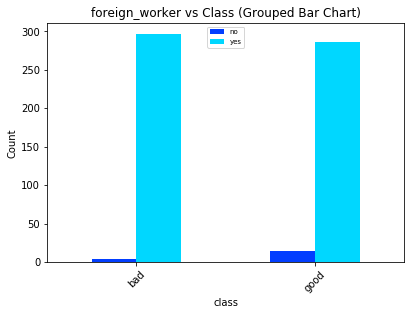

In [4]:
for c in s.index.tolist():
      draw(c)